In [1]:
import matplotlib.pyplot as plt
import numpy as np
SaveFileZ = "ATLDATA.npz"

def CreateSeries(File,FreqRef):

    with open(File) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    V = [x.strip().split("\t")[1] for x in content] 
    V = np.array(V).astype(np.int)
    t = [x.strip().split("\t")[0] for x in content]
    t = np.array(t).astype(np.float)/FreqRef
    MaxT = t[-1]*FreqRef

    return t,V,MaxT


def GetV1(Volts):
    
    Map = np.zeros((len(V),34), dtype=np.int)
    for i in range(len(Volts)):
        val = V[i]
        for k in range(34):
            Map[i][k] = (val & 2**k)/2**k

    return Map

In [3]:
AlreadCreated = True
if AlreadCreated:
    npzfile = np.load(SaveFileZ)
    D1 = npzfile['D1']
    D2 = npzfile['D2']
    t  = npzfile['t']

else:    
    t,V,MaxT = CreateSeries("test3.atl3",10000000)
    Map = np.asarray(GetV1(V), dtype=bool)
    D1 = np.transpose(Map)[6]
    D2 = np.transpose(Map)[21]
    x = np.arange(len(D1))
    f = MaxT/len(t)
    fAcq = 1/f*1000
    print "Acquisition freq is: "+str(fAcq)+" MHz"


### Difficult to find the beginning of a number in stream

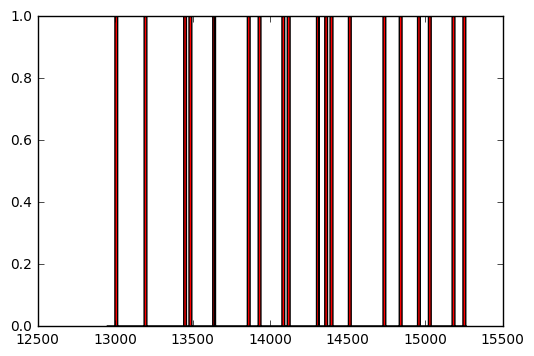

In [4]:
plt.fill(t[145000:171000],D1[145000:171000],"r")
plt.fill(t[145000:171000],D2[145000:171000],"b")
plt.show()

## Width of the pulse reads nicely

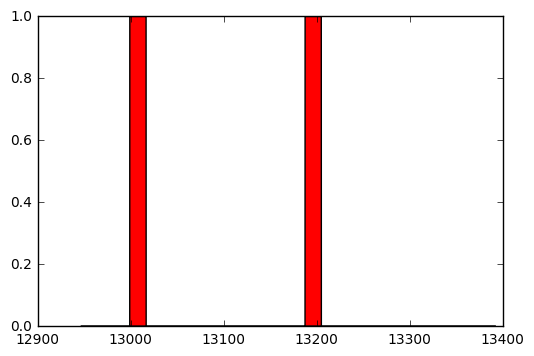

In [5]:
plt.fill(t[145000:150000],D1[145000:150000],"r")
plt.fill(t[145000:150000],D2[145000:150000],"b")
plt.show()

In [6]:
MaxT = t[-1]
f = MaxT/len(t)
fAcq = 1/f

widthPulse = np.sum(D1[145000:150000])/2
print "Width of a pulse is: "+str(widthPulse)+" pixels"
print "Width of a pulse is "+str(widthPulse/fAcq)+" microsecond"

print "There are 6 bits of info per pulse, a sequence lasts "+str(6*2*widthPulse/fAcq)+ "us"

Width of a pulse is: 196 pixels
Width of a pulse is 17.4999825 microsecond
There are 6 bits of info per pulse, a sequence lasts 209.99979us


# testing the counter

It seems we need something to clear the signal from the counter :p

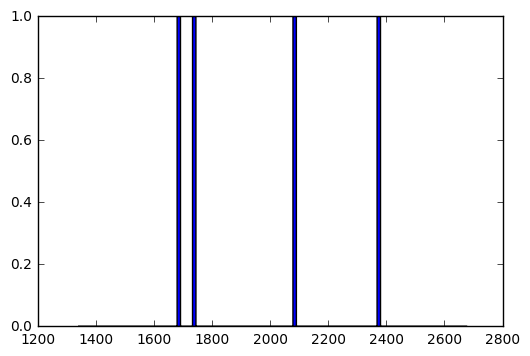

In [7]:
#plt.fill(t[145000:170000],D1[145000:170000],"r")
plt.fill(t[15000:30000],D2[15000:30000],"b")
plt.show()

In [8]:
widthPulse = np.sum(D2[15000:30000])/4.0
print "Width of a pulse is: "+str(widthPulse)+" pixels"
print "Width of a pulse is "+str(widthPulse/fAcq)+" microsecond"


Width of a pulse is: 131.25 pixels
Width of a pulse is 11.7187382812 microsecond


# @TODO

* Add a global pos instead
* Add a 2T marker at the beginning of a string of data